In [126]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from sklearn.datasets import load_wine
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import make_scorer
from sklearn.ensemble import GradientBoostingClassifier

import seaborn as sns
import sklearn

#import graphviz

#import xgboost as xgb
#from xgboost import XGBClassifier

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [347]:
#"late_21_early_18_early_20.txt"#bpA
#"late_18_early_15_early_17.txt"#bpB
#"late_15_early_12_early_13.txt"#bpC
#"late_12_early_4_early_5.txt"#bpD
#"late_13_early_7_early_6.txt"#bpE
#"late_17_early_14_early_16.txt"#bpF
#"late_14_early_11_early_8.txt"#bpG
#"late_16_early_9_early_10.txt"#bpH
#"late_20_early_19_early_2.txt"#bpI
#"late_19_early_1_early_3.txt"#bpJ

dat = pd.read_csv('/BP_DEG/multiclass/late_16_early_9_early_10.txt','\t')
bp = "bpH"

In [348]:
dat.head()
X=dat.iloc[:,1:-1]

,Unnamed: 0,Neurod6,Tubb5,Eef2,H3f3b,Ttc28,Cd24a,Eef1a1,Ptn,Bhlhe22,...,Syt7,Nog,E2f7,Btg2,Zfp459,Ermn,Cox6a2,A830029E22Rik,Mcm2,class
0,late_16.E18_S3_CGGACTGAGCTGTTCA,2.027580,4.272045,1.895135,2.888166,0.663842,2.777318,3.553079,0.000000,0.000000,...,0.663842,0.0,0.0,0.000000,0.0,0.0,0.0,1.059345,0.0,late_16
1,late_16.E18_5_S1_GAGGTGAGTTAGGGTG,1.388172,4.062903,2.304838,3.436410,0.000000,1.388172,2.946811,0.000000,0.000000,...,0.000000,0.0,0.0,1.388172,0.0,0.0,0.0,0.000000,0.0,late_16
2,late_16.E18_S3_GGAAAGCGTGAGCGAT,3.144998,3.914362,2.785190,2.920028,0.000000,3.240971,3.866569,1.505934,0.000000,...,0.774475,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,late_16
3,late_16.E18_5_S1_TACAGTGGTACATCCA,2.871006,4.660483,1.750678,3.386119,1.217655,2.352994,3.386119,2.352994,2.096515,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,late_16
4,late_16.P1_S1_ATCGAGTAGTTGTAGA,2.263819,3.404249,2.145029,3.015263,0.000000,2.842701,3.162385,0.731151,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,late_16


In [349]:
y=dat['class'].astype('category').cat.codes
dict( enumerate(dat['class'].astype('category').cat.categories ) )
y=y.to_frame()
y.columns=['label']
y.head()
y.label.value_counts()
X.shape,y.shape

{0: 'early_10', 1: 'early_9', 2: 'late_16'}

,label
0,2
1,2
2,2
3,2
4,2


2    496
1    354
0    253
Name: label, dtype: int64

((1103, 653), (1103, 1))

In [350]:
#pipe=make_pipeline(StandardScaler(with_std=False),GradientBoostingClassifier())
pipe=make_pipeline(GradientBoostingClassifier())

In [351]:
pipe.named_steps

{'gradientboostingclassifier': GradientBoostingClassifier()}

In [352]:
X.values.shape

(1103, 653)

In [353]:
nfolds=10
param_grid = {'gradientboostingclassifier__n_estimators': [25, 50, 75, 100], 'gradientboostingclassifier__max_depth': [3,4,5]}
search = GridSearchCV(pipe, param_grid, iid=False, cv=StratifiedKFold(nfolds))
search.fit(X.values,y.values.ravel())

/Users/ehabibi/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('gradientboostingclassifier',
                                        GradientBoostingClassifier())]),
             iid=False,
             param_grid={'gradientboostingclassifier__max_depth': [3, 4, 5],
                         'gradientboostingclassifier__n_estimators': [25, 50,
                                                                      75,
                                                                      100]})

In [354]:
search.cv_results_

{'mean_fit_time': array([ 3.37302675,  6.82606339, 10.0280201 , 13.3510335 ,  4.37684224,
         8.67556796, 13.05142741, 18.58186452,  5.48166027, 11.51955829,
        16.26593904, 22.25790906]),
 'std_fit_time': array([0.07581927, 0.14410137, 0.12568664, 0.06938822, 0.09160209,
        0.03219265, 0.06056791, 0.8973842 , 0.19014679, 0.65688319,
        0.21026721, 0.67287242]),
 'mean_score_time': array([0.00197685, 0.00091491, 0.00100219, 0.00110488, 0.00079131,
        0.00098217, 0.00117381, 0.00136721, 0.00088146, 0.00108945,
        0.00137341, 0.00162318]),
 'std_score_time': array([2.38270136e-03, 9.50358228e-05, 2.83808754e-05, 3.30043658e-05,
        1.53275520e-05, 3.96422422e-05, 5.22531780e-05, 5.85472005e-05,
        8.82769347e-05, 4.44293838e-05, 1.95712677e-04, 2.09659785e-04]),
 'param_gradientboostingclassifier__max_depth': masked_array(data=[3, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5],
              mask=[False, False, False, False, False, False, False, False,
          

In [355]:
search.best_score_, search.best_params_

(0.7701719901719902,
 {'gradientboostingclassifier__max_depth': 4,
  'gradientboostingclassifier__n_estimators': 100})

In [356]:
classes=dict( enumerate(dat['class'].astype('category').cat.categories ) )


In [357]:
classes

{0: 'early_10', 1: 'early_9', 2: 'late_16'}

In [358]:
max_depth=search.best_params_['gradientboostingclassifier__max_depth']
n_estimators=search.best_params_['gradientboostingclassifier__n_estimators']
n_feats= X.values.shape[1]
#optpipe=make_pipeline(StandardScaler(with_std=False),GradientBoostingClassifier(max_depth=4, n_estimators=50))
optpipe=make_pipeline(GradientBoostingClassifier(max_depth=max_depth, n_estimators=n_estimators))

In [359]:
cvres=cross_validate(pipe,X,y.squeeze(),cv=nfolds,scoring='f1_micro', return_estimator=True, return_train_score=True)


In [360]:
cvres['test_score']

array([0.5045045 , 0.59459459, 0.71171171, 0.7       , 0.72727273,
       0.77272727, 0.93636364, 0.90909091, 0.9       , 0.90909091])

In [361]:
cvres['train_score']

array([1.        , 1.        , 0.99899194, 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

In [362]:
len(classes)

3

In [363]:
feat_imps=np.zeros((10,len(classes),n_feats))
#4 should be equal to the number of features 
# 2 class put 1

In [364]:
cvres

{'fit_time': array([13.03830409, 13.12755799, 13.71606207, 13.26908588, 13.43211913,
        13.38860202, 13.40870905, 13.5130558 , 13.53002381, 13.41954017]),
 'score_time': array([0.01138687, 0.00511599, 0.00601983, 0.00475097, 0.0054729 ,
        0.0052712 , 0.00727916, 0.00477815, 0.00485826, 0.005054  ]),
 'estimator': (Pipeline(steps=[('gradientboostingclassifier', GradientBoostingClassifier())]),
  Pipeline(steps=[('gradientboostingclassifier', GradientBoostingClassifier())]),
  Pipeline(steps=[('gradientboostingclassifier', GradientBoostingClassifier())]),
  Pipeline(steps=[('gradientboostingclassifier', GradientBoostingClassifier())]),
  Pipeline(steps=[('gradientboostingclassifier', GradientBoostingClassifier())]),
  Pipeline(steps=[('gradientboostingclassifier', GradientBoostingClassifier())]),
  Pipeline(steps=[('gradientboostingclassifier', GradientBoostingClassifier())]),
  Pipeline(steps=[('gradientboostingclassifier', GradientBoostingClassifier())]),
  Pipeline(steps=[(

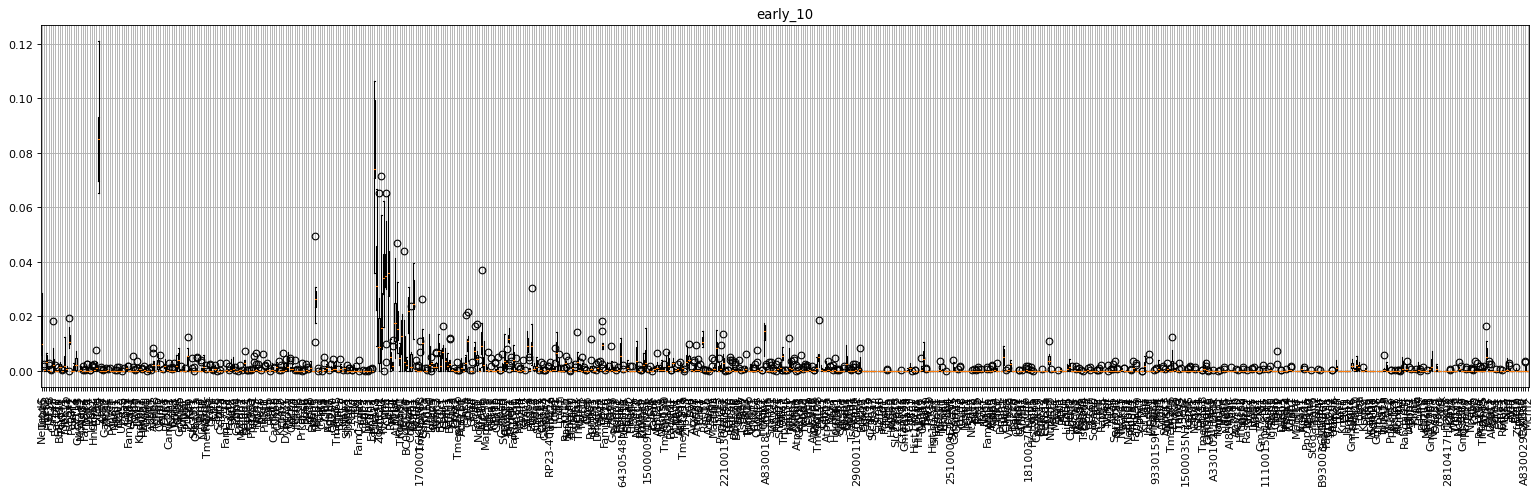

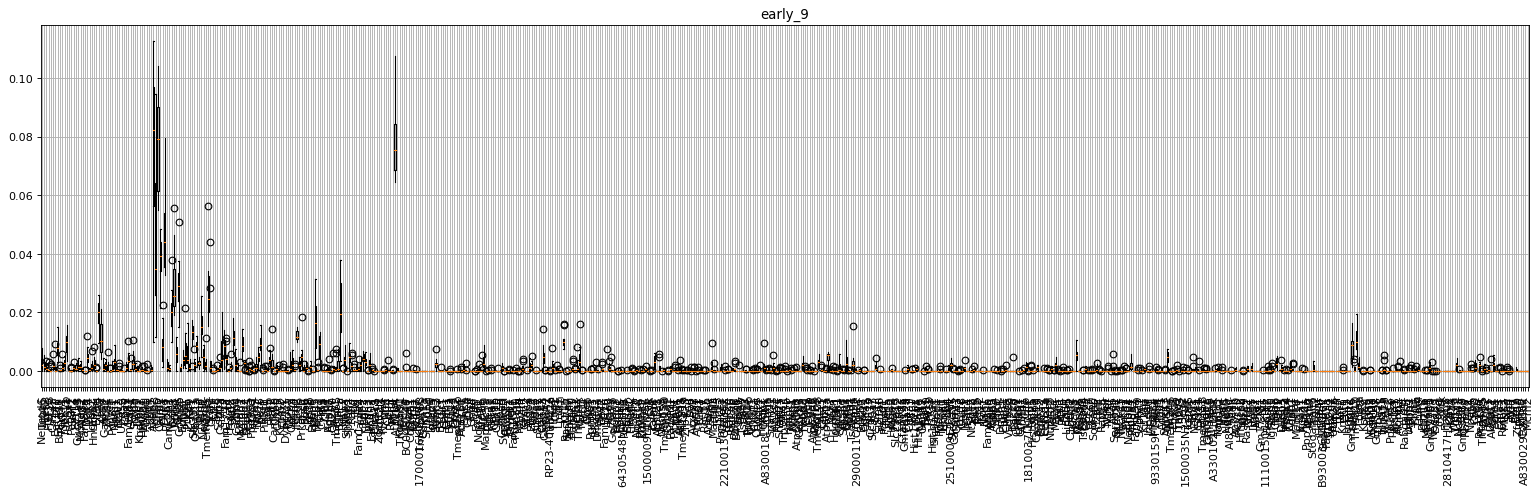

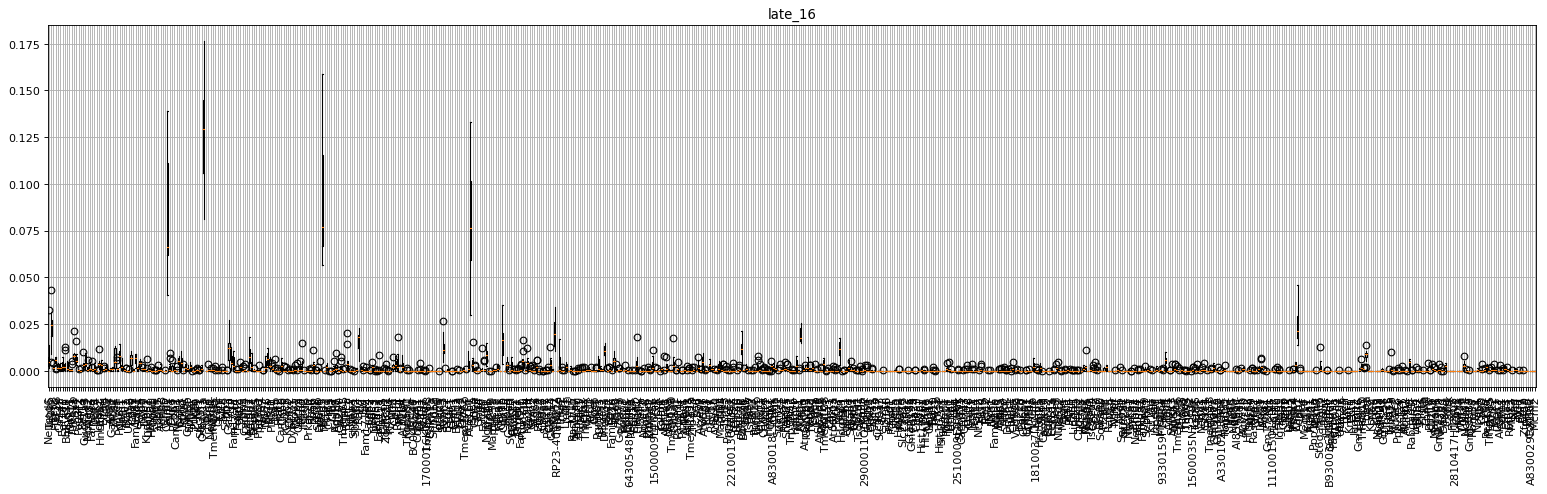

In [365]:
for fold in range(nfolds):
    for c in range(3):
        for i in range(n_estimators):
            feat_imps[fold,c]+=cvres['estimator'][fold].named_steps.gradientboostingclassifier.estimators_[i,c].tree_.compute_feature_importances(normalize=False)
        feat_imps[fold,c]/=feat_imps[fold,c].sum()
plt.figure(num=None, figsize=(24, 6), dpi=80, facecolor='w', edgecolor='k');
plt.boxplot(feat_imps[:,0,:]);
plt.xticks(range(1,n_feats+1),dat.columns[1:-1],rotation='vertical')
plt.grid();
plt.title(classes[0]);

plt.figure(num=None, figsize=(24, 6), dpi=80, facecolor='w', edgecolor='k');
plt.boxplot(feat_imps[:,1,:]);
plt.xticks(range(1,n_feats+1),dat.columns[1:-1],rotation='vertical')
plt.grid();
plt.title(classes[1]);


plt.figure(num=None, figsize=(24, 6), dpi=80, facecolor='w', edgecolor='k');
plt.boxplot(feat_imps[:,2,:]);
plt.xticks(range(1,n_feats+1),dat.columns[1:-1],rotation='vertical')
plt.grid();
plt.title(classes[2]);




In [366]:
feat_imps.shape
n_feats

(10, 3, 653)

653

In [367]:
df = dat.columns[1:-1]

for i in range(len(classes)):
    name = classes[i]
    np.savetxt('/BP_DEG/multiclass/results/' + bp + '_' + name + '.csv', feat_imps[:,i,:], delimiter=",")
    